# Makeup Subscriptions - A/B Test Data Analyis

In [34]:
import matplotlib.pyplot as mplplt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

ab_test_data = pd.read_csv('AB full run.csv')
ab_test_data.head

<bound method NDFrame.head of      participant_id condition  age     income_bracket      gender  \
0              1001   Control   23    $25,000-$49,999      Female   
1              1002   Control   31    $50,000-$74,999      Female   
2              1003    Change   27    $75,000-$99,999      Female   
3              1004   Control   42  $100,000-$149,999      Female   
4              1005    Change   35    $50,000-$74,999      Female   
..              ...       ...  ...                ...         ...   
506            1507   Control   31    $75,000-$99,999      Female   
507            1508    Change   42    $25,000-$49,999  Non-binary   
508            1509   Control   26    $50,000-$74,999      Female   
509            1510    Change   34  $100,000-$149,999      Female   
510            1511   Control   45    $75,000-$99,999      Female   

     cancellation  satisfaction_composite  product_quality  product_relevance  \
0               1                     5.2                6  

In [52]:
participant_count = ab_test_data.shape[0]
control_count = (ab_test_data == 'Control')
control_count = control_count.sum().sum()
variant_count = participant_count - control_count

ab_test_data['age_bracket'] = ab_test_data['age'].floordiv(5) * 5

brackets = {'Under $25,000': 0, '$25,000-$49,999': 25, '$50,000-$74,999': 50, '$75,000-$99,999': 75, '$100,000-$149,999': 100, '$150,000+': 150}
ab_test_data['income_thousands'] = ab_test_data['income_bracket'].map(brackets)

nps_dict = {1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: 0, 8: 0, 9: 1, 10: 1}
ab_test_data['nps'] = ab_test_data['recommend_likelihood'].map(nps_dict)

print(f'Total Participants: {participant_count}')
print()
print(ab_test_data['condition'].value_counts(normalize=True) * 100)
print()
print(ab_test_data['gender'].value_counts(normalize=True) * 100)
print()
print(ab_test_data['income_thousands'].value_counts(normalize=True) * 100)
print()
print(ab_test_data['age_bracket'].value_counts(normalize=True) * 100)
print()

cancel_and_spend_count = ab_test_data.query('cancellation == 1 & additional_revenue > 0')
cancel_and_spend_count = cancel_and_spend_count.shape[0]
print(f'Customers who cancelled and still made extra purchases: {cancel_and_spend_count}')



Total Participants: 511

condition
Control    50.293542
Change     49.706458
Name: proportion, dtype: float64

gender
Female        90.998043
Male           5.675147
Non-binary     3.326810
Name: proportion, dtype: float64

income_thousands
50     25.831703
75     25.831703
100    18.199609
25     13.502935
0      10.958904
150     5.675147
Name: proportion, dtype: float64

age_bracket
25    26.810176
30    21.526419
35    19.373777
40    14.677104
45     9.980431
20     6.849315
50     0.782779
Name: proportion, dtype: float64

Customers who cancelled and still made extra purchases: 0


Comparison of descriptive statistics:
Control cancellation rate: 0.486
Variant cancellation rate: 0.000
Control mean NPS: -0.802
Variant mean NPS: 0.016
Control mean composite satisfaction: 5.729
Variant mean composite satisfaction: 7.970
Control mean added revenue: 4.250
Variant mean added revenue: 18.969
Control variance: 50.165
Variant variance: 377.530
Difference of means of added revenue (variant - control): 14.719327
Difference of cancellation rates (variant - control): -0.486381
Welch's t-test results for added revenue: t = -11.35, p = 0.000.
Welch's t-test results for cancellation rate: t = 15.57, p = 0.000.
Based on the results of the test and the difference of the means, we strongly recommend deploying the variant.


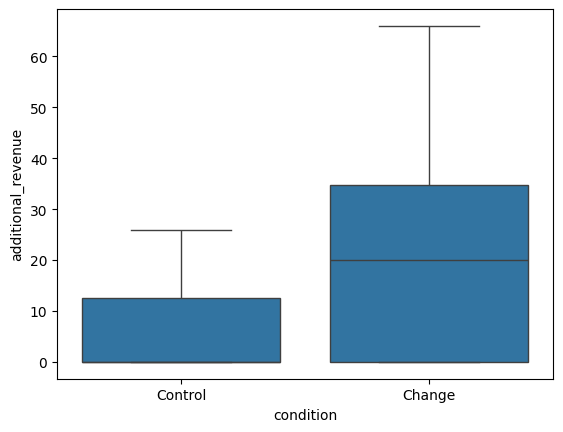

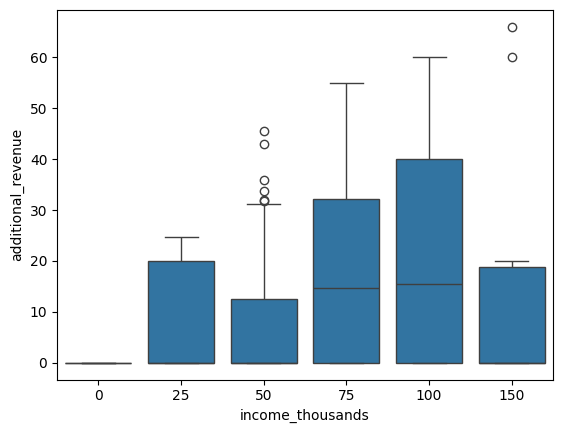

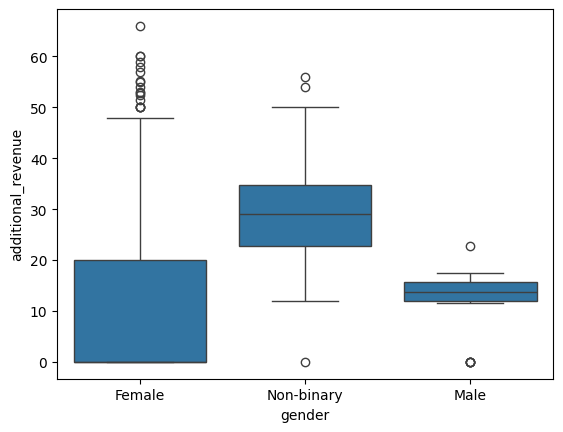

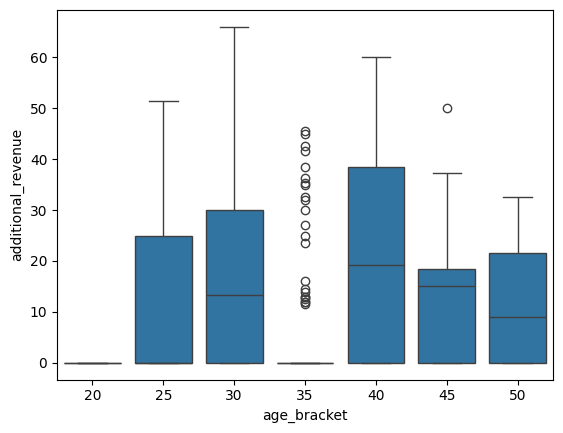

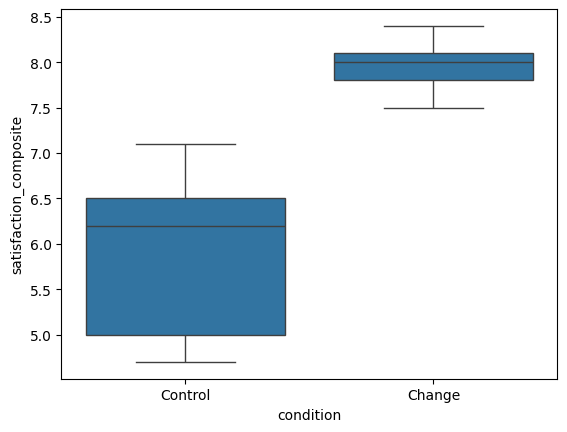

In [59]:
ctrl_data = ab_test_data[ab_test_data['condition'] == 'Control']
var_data = ab_test_data[ab_test_data['condition'] == 'Change']

mplplt.figure()
sns.boxplot(data=ab_test_data, x='condition', y='additional_revenue')
mplplt.figure()
sns.boxplot(data=ab_test_data, x='income_thousands', y='additional_revenue')
mplplt.figure()
sns.boxplot(data=ab_test_data, x='gender', y='additional_revenue')
mplplt.figure()
sns.boxplot(data=ab_test_data, x='age_bracket', y='additional_revenue')
mplplt.figure()
sns.boxplot(data=ab_test_data, x='condition', y='satisfaction_composite')

print('Comparison of descriptive statistics:')
print(f'Control cancellation rate: {ctrl_data['cancellation'].mean():.3f}')
print(f'Variant cancellation rate: {var_data['cancellation'].mean():.3f}')
print(f'Control mean NPS: {ctrl_data['nps'].mean():.3f}')
print(f'Variant mean NPS: {var_data['nps'].mean():.3f}')
print(f'Control mean composite satisfaction: {ctrl_data['satisfaction_composite'].mean():.3f}')
print(f'Variant mean composite satisfaction: {var_data['satisfaction_composite'].mean():.3f}')
print(f'Control mean added revenue: {ctrl_data['additional_revenue'].mean():.3f}')
print(f'Variant mean added revenue: {var_data['additional_revenue'].mean():.3f}')
print(f'Control variance: {ctrl_data['additional_revenue'].var():.3f}')
print(f'Variant variance: {var_data['additional_revenue'].var():.3f}')
print(f'Difference of means of added revenue (variant - control): {var_data['additional_revenue'].mean() - ctrl_data['additional_revenue'].mean():3f}')
print(f'Difference of cancellation rates (variant - control): {var_data['cancellation'].mean() - ctrl_data['cancellation'].mean():3f}')

ttest = stats.ttest_ind_from_stats(ctrl_data['additional_revenue'].mean(), ctrl_data['additional_revenue'].std(), control_count, var_data['additional_revenue'].mean(), var_data['additional_revenue'].std(), variant_count, equal_var=False)
ttest2 = stats.ttest_ind_from_stats(ctrl_data['cancellation'].mean(), ctrl_data['cancellation'].std(), control_count, var_data['cancellation'].mean(), var_data['cancellation'].std(), variant_count, equal_var=False)

print(f'Welch\'s t-test results for added revenue: t = {ttest.statistic:.2f}, p = {ttest.pvalue:.3f}.' )
print(f'Welch\'s t-test results for cancellation rate: t = {ttest2.statistic:.2f}, p = {ttest2.pvalue:.3f}.' )
recommend_bool = (var_data['additional_revenue'].mean() - ctrl_data['additional_revenue'].mean() > 0)
significance_bool = (ttest.pvalue < 0.1)

if recommend_bool and significance_bool:
    print('Based on the results of the test and the difference of the means, we strongly recommend deploying the variant.')
elif not recommend_bool:
    print('Because the mean revenue for the variant is less than the mean revenue for the control, we do not recommend deploying the variant.')
elif not significance_bool:
    print('The test results do not reflect a significant revenue difference between control and variant, so we recommend not deploying the variant.')